In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv("Manufacturing_Dataset.csv")

In [4]:
df.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9


In [5]:
df.shape

(3000, 20)

In [6]:
df.dtypes

Production ID                      object
Date                               object
Product Type                       object
Machine ID                          int64
Shift                              object
Units Produced                      int64
Defects                           float64
Production Time Hours             float64
Material Cost Per Unit            float64
Labour Cost Per Hour              float64
Energy Consumption kWh            float64
Operator Count                      int64
Maintenance Hours                 float64
Down time Hours                   float64
Production Volume Cubic Meters    float64
Scrap Rate                        float64
Rework Hours                      float64
Quality Checks Failed               int64
Average Temperature C             float64
Average Humidity Percent          float64
dtype: object

In [7]:
df.isna().sum()

Production ID                       0
Date                                0
Product Type                        0
Machine ID                          0
Shift                               0
Units Produced                      0
Defects                           299
Production Time Hours               0
Material Cost Per Unit              0
Labour Cost Per Hour                0
Energy Consumption kWh              0
Operator Count                      0
Maintenance Hours                 300
Down time Hours                   300
Production Volume Cubic Meters      0
Scrap Rate                          0
Rework Hours                      300
Quality Checks Failed               0
Average Temperature C               0
Average Humidity Percent            0
dtype: int64

In [8]:
df_new = pd.read_csv("Manufacturing_Dataset.csv")

In [9]:
df_new["Date"] = pd.to_datetime(df["Date"])

In [10]:
df_new["Date"].dtype

dtype('<M8[ns]')

In [11]:
df_new["Product Type"] = df_new["Product Type"].astype("category")
df_new["Shift"] = df_new["Shift"].astype("category")

In [12]:
print(df_new["Product Type"].dtype)
print(df_new["Shift"].dtype)

category
category


In [13]:
df_new.dtypes

Production ID                             object
Date                              datetime64[ns]
Product Type                            category
Machine ID                                 int64
Shift                                   category
Units Produced                             int64
Defects                                  float64
Production Time Hours                    float64
Material Cost Per Unit                   float64
Labour Cost Per Hour                     float64
Energy Consumption kWh                   float64
Operator Count                             int64
Maintenance Hours                        float64
Down time Hours                          float64
Production Volume Cubic Meters           float64
Scrap Rate                               float64
Rework Hours                             float64
Quality Checks Failed                      int64
Average Temperature C                    float64
Average Humidity Percent                 float64
dtype: object

In [14]:
num_var_table  = df_new.select_dtypes(include=["int64", "Float64"]).describe()

In [15]:
num_list = num_var_table.columns.to_list()
num_list

['Machine ID',
 'Units Produced',
 'Defects',
 'Production Time Hours',
 'Material Cost Per Unit',
 'Labour Cost Per Hour',
 'Energy Consumption kWh',
 'Operator Count',
 'Maintenance Hours',
 'Down time Hours',
 'Production Volume Cubic Meters',
 'Scrap Rate',
 'Rework Hours',
 'Quality Checks Failed',
 'Average Temperature C',
 'Average Humidity Percent']

<Axes: xlabel='Units Produced', ylabel='Count'>

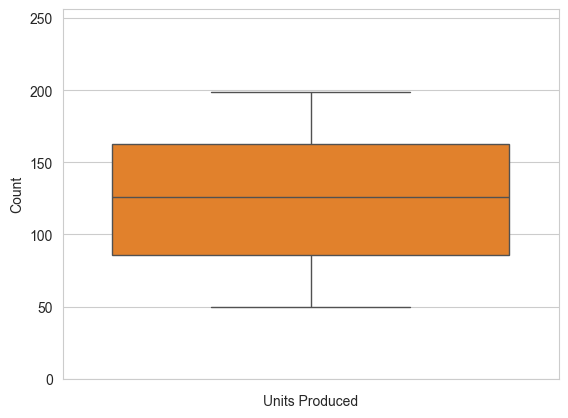

In [16]:
sns.set_style("whitegrid")
sns.histplot(data=df_new, x="Units Produced")
sns.boxplot(df_new["Units Produced"], fliersize=1)


In [17]:
df_new["Units Produced"].quantile(0.25)
df_new["Units Produced"].quantile(0.75)

163.0

In [18]:
len(num_list)

16

In [19]:
# mean = df_new["Units Produced"].mean()
# med = df_new["Units Produced"].median()
# mod = df_new["Units Produced"].mode()
# ran = df_new["Units Produced"].max() - df_new["Units Produced"].min()
# std_dev = df_new["Units Produced"].std()
# skew = df_new["Units Produced"].skew()
# kurt = df_new["Units Produced"].kurtosis()
# points = mean - std_dev, mean + std_dev

# plt.figure(figsize=(10,5))
# sns.kdeplot(df_new["Units Produced"], fill=True)
# sns.lineplot(x=points, y=[0,0], color="black", label="within 1 stddev")
# sns.scatterplot(x=[mean],y=[0], color="red", label="mean")
# sns.scatterplot(x=[med],y=[0], color="blue", label="median")
# plt.xlabel('{}'.format("Units Produced"), fontsize=20)
# plt.title('within 1 stddev = {}; kurtosis = {};\nskew = {}; ran = {};\nmean = {}; median = {}'.format(
#   (round(points[0],2),round(points[1],2)),
#   round(kurt,2),
#   round(skew,2),
#   round(ran,2),
#   round(mean,2),
#   round(med,2)
#   )
# )

In [20]:
group_one = [
 'Units Produced',
 'Defects',
 'Production Time Hours',
 'Material Cost Per Unit',
 'Labour Cost Per Hour'
 ]
group_two = ['Energy Consumption kWh',
 'Operator Count',
 'Maintenance Hours',
 'Down time Hours',
 'Production Volume Cubic Meters'
 ]
group_three = [
 'Scrap Rate',
 'Rework Hours',
 'Quality Checks Failed',
 'Average Temperature C',
 'Average Humidity Percent']

In [21]:
def UniVar(data, group):
  size = len(group)
  plt.figure(figsize=(7*size,20), dpi=100)

  for j,i in enumerate(group):
    var_mean = data[i].mean()
    var_med = data[i].median()
    var_mode = data[i].mode()
    var_std = data[i].std()
    var_ran = data[i].max() - data[i].min()
    var_skew = data[i].skew()
    var_kurtosis = data[i].kurtosis()

    # calculating points of standard deviation
    points = var_mean - var_std, var_mean + var_std

    plt.subplot(2,3,j+1)
    sns.kdeplot(data[i], fill=True)
    sns.lineplot(x=points, y=[0,0], color="black", label="within 1 stddev")
    sns.scatterplot(x=var_mean, y=[0],color="red", label="mean")
    sns.scatterplot(x=var_med, y=[0], color="blue", label="median")
    plt.xlabel('{}'.format(i), fontsize=20)
    plt.title('within 1 stddev = {};kurtosis= {};\nskew = {};data_ran = {};\nmean = {} median = {}'.format
              (
                (round(points[0],2),round(points[1],2)),
                round(var_kurtosis,2),
                round(var_skew,2),
                round(var_ran,2),
                round(var_mean,2),
                round(var_med,2)
              )
              )


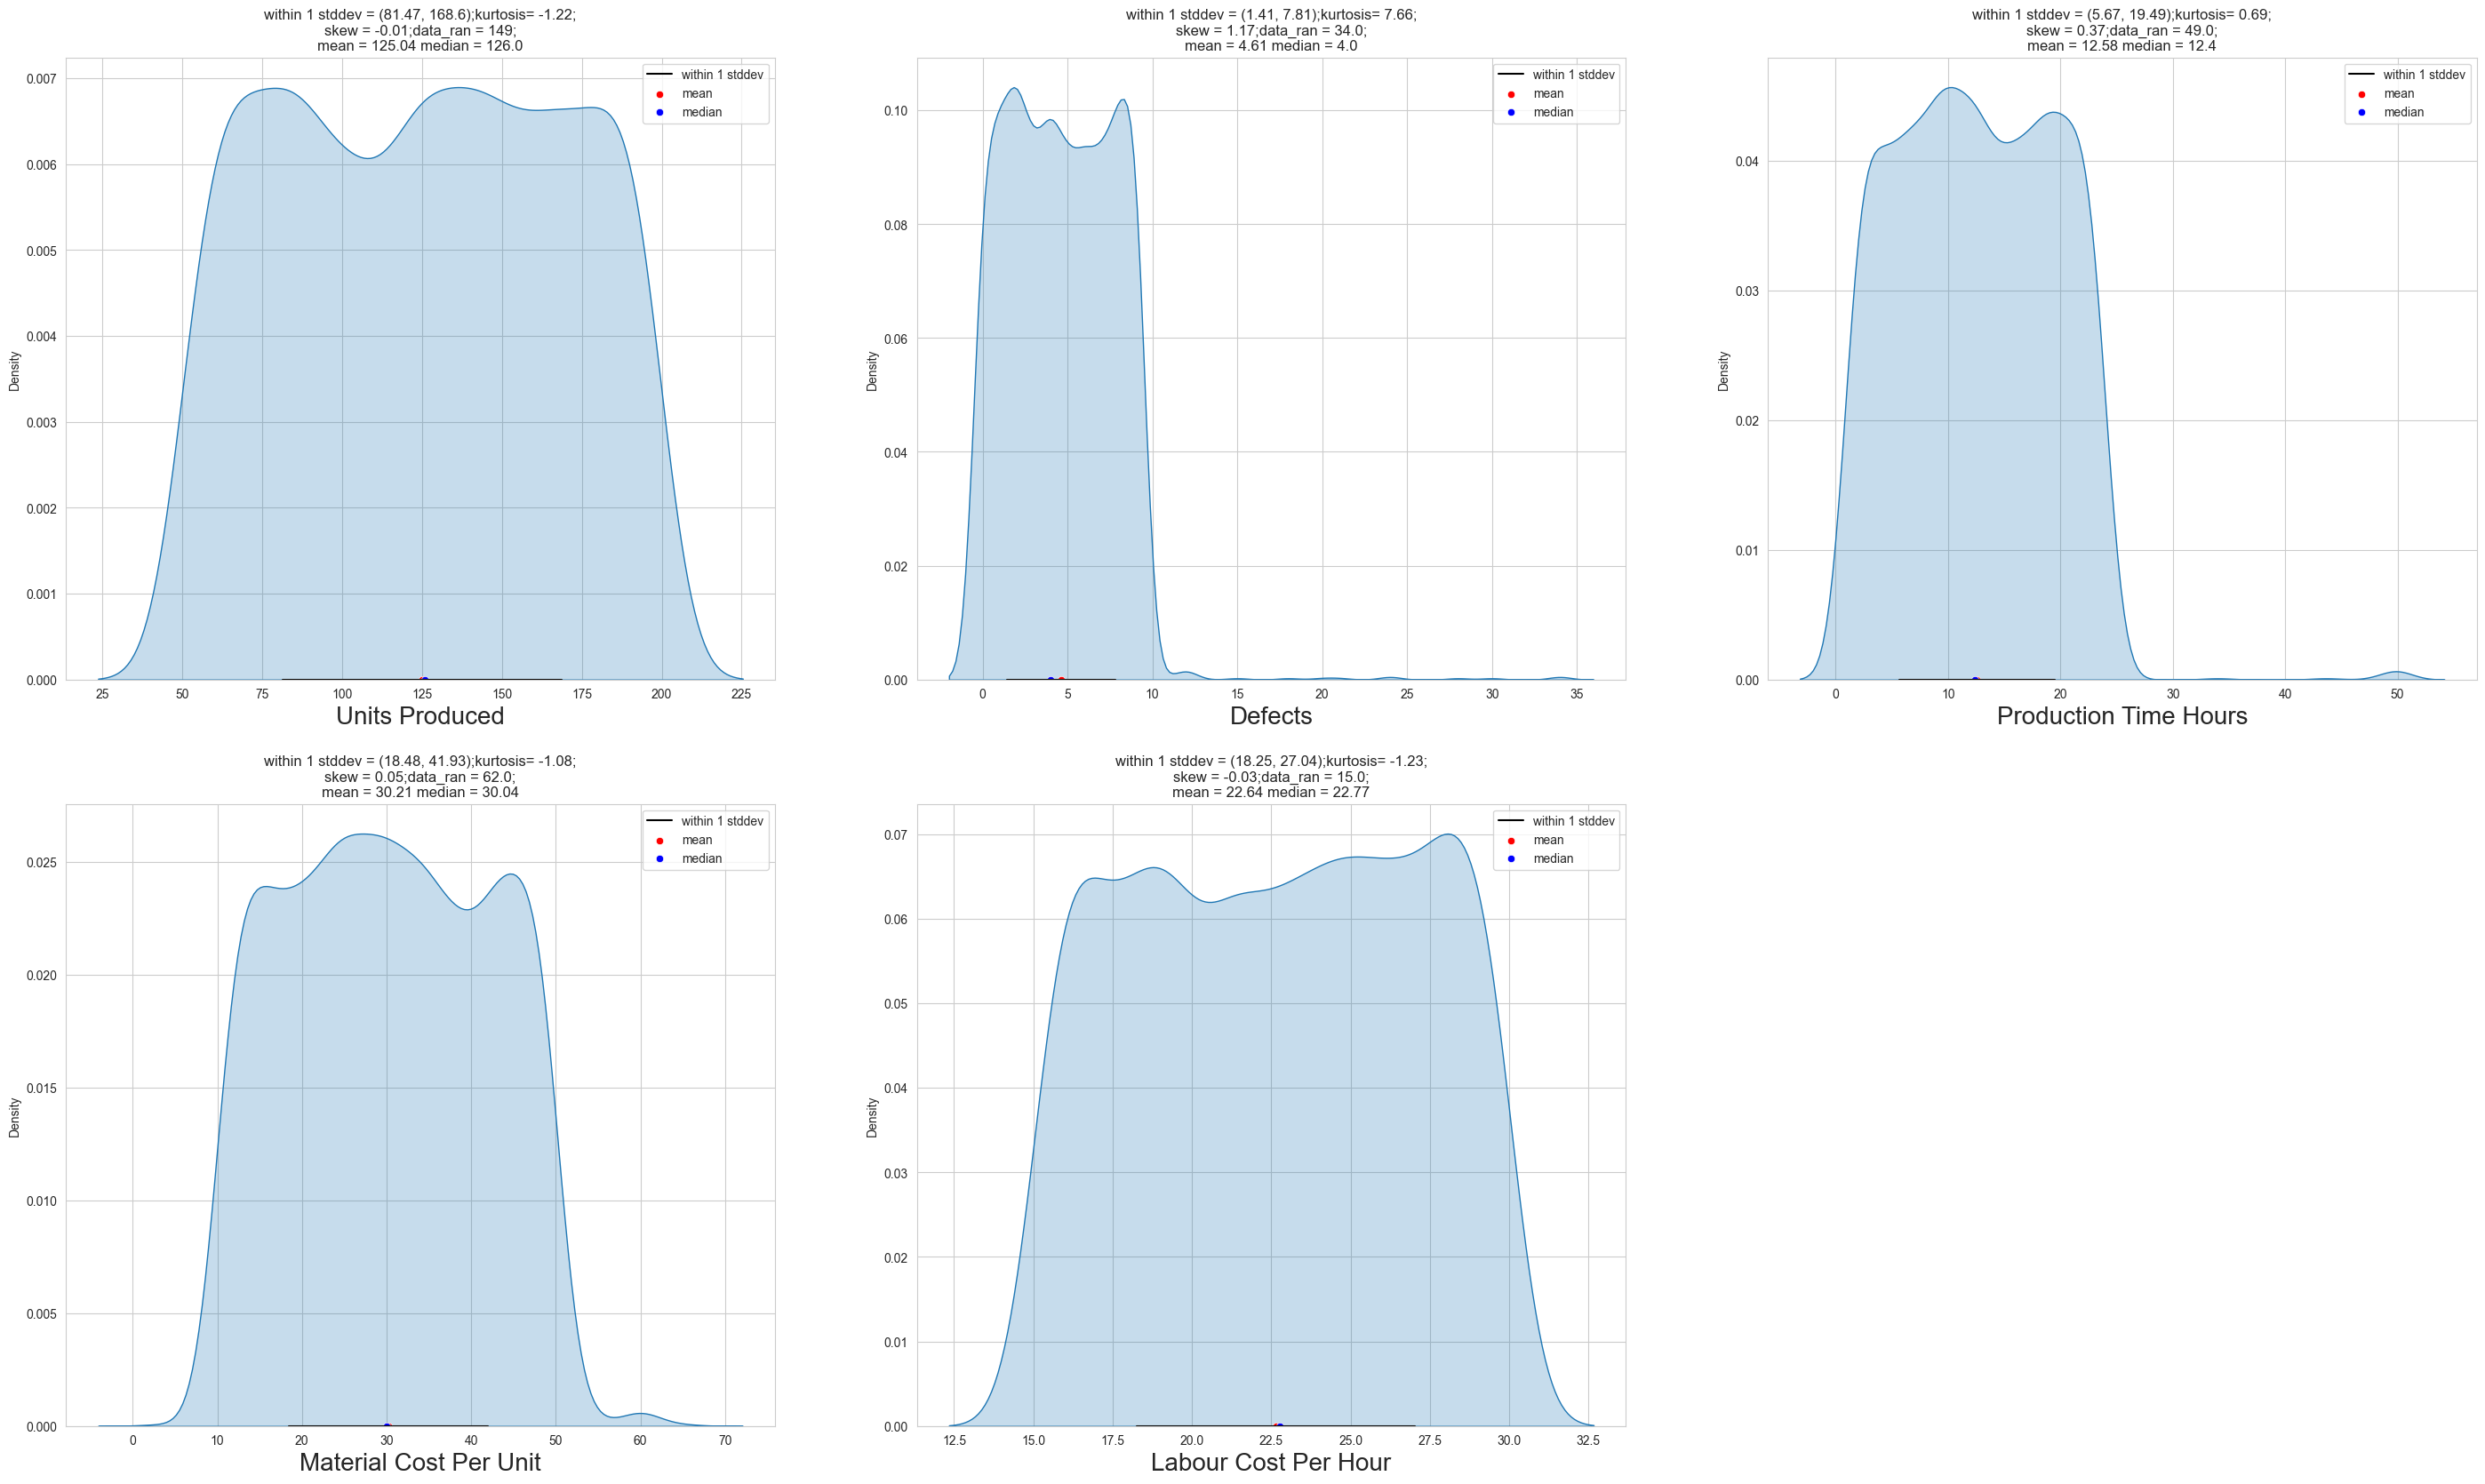

In [22]:
UniVar(df_new, group_one)

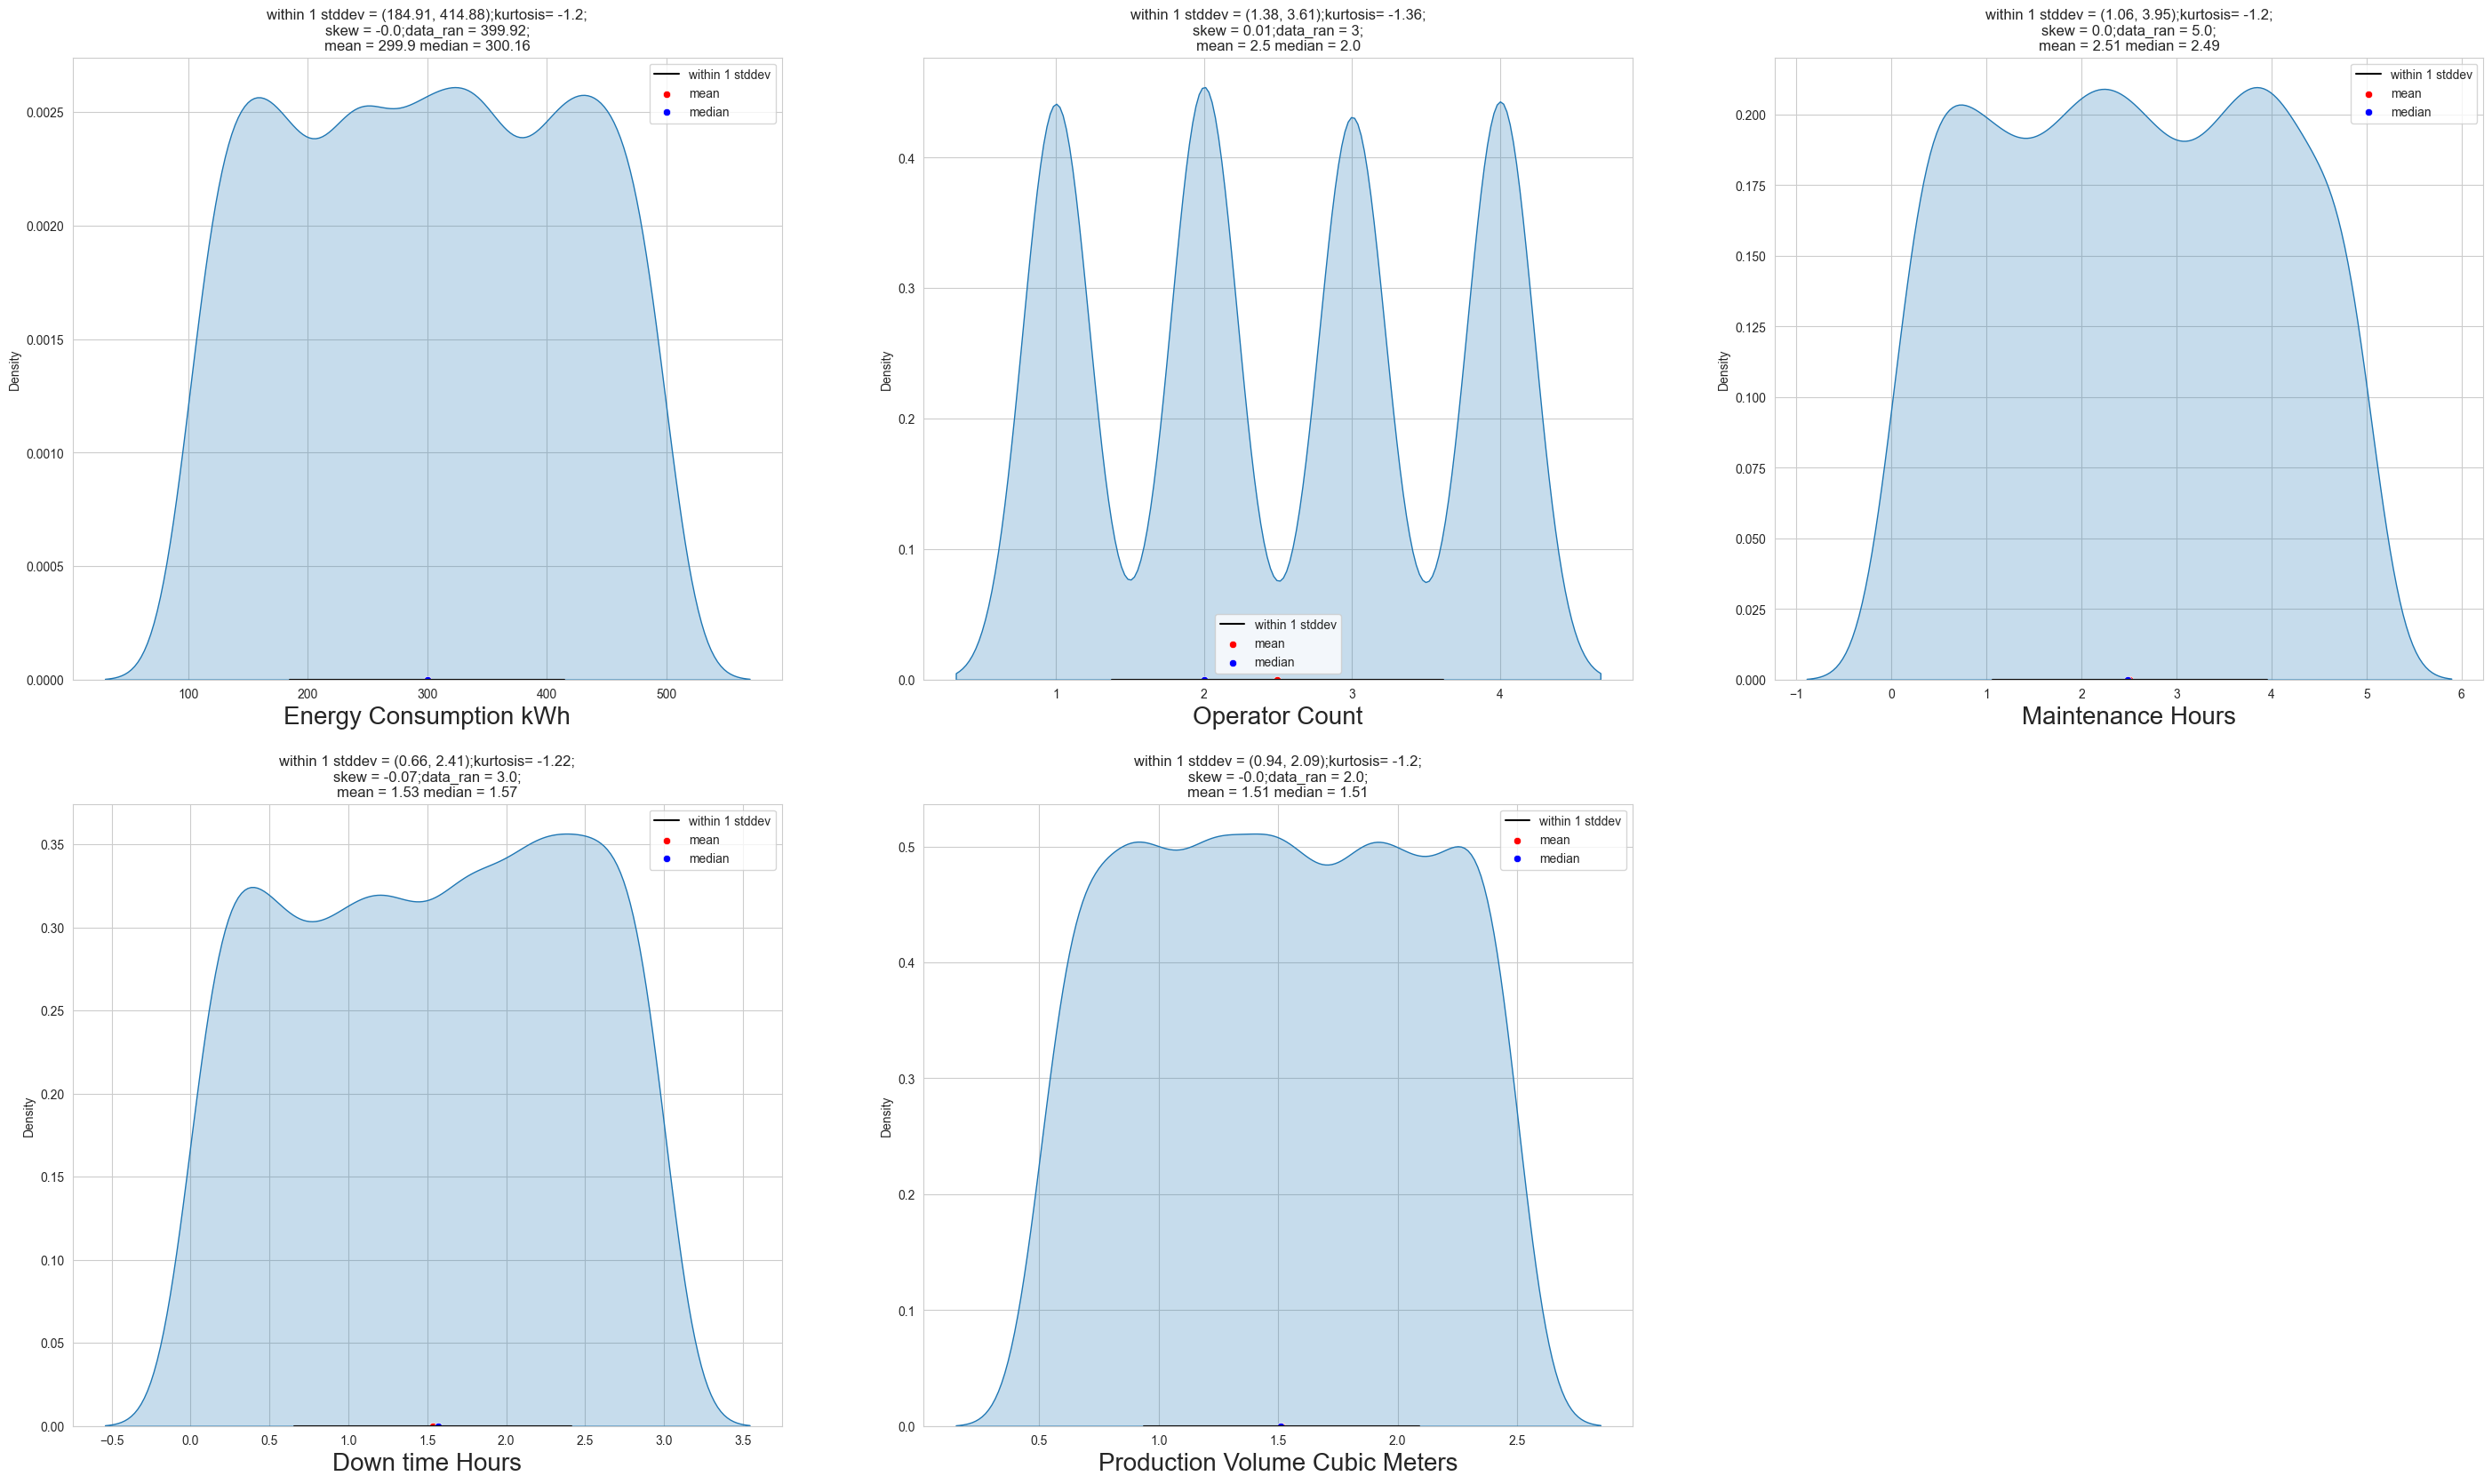

In [23]:
UniVar(df_new, group_two)

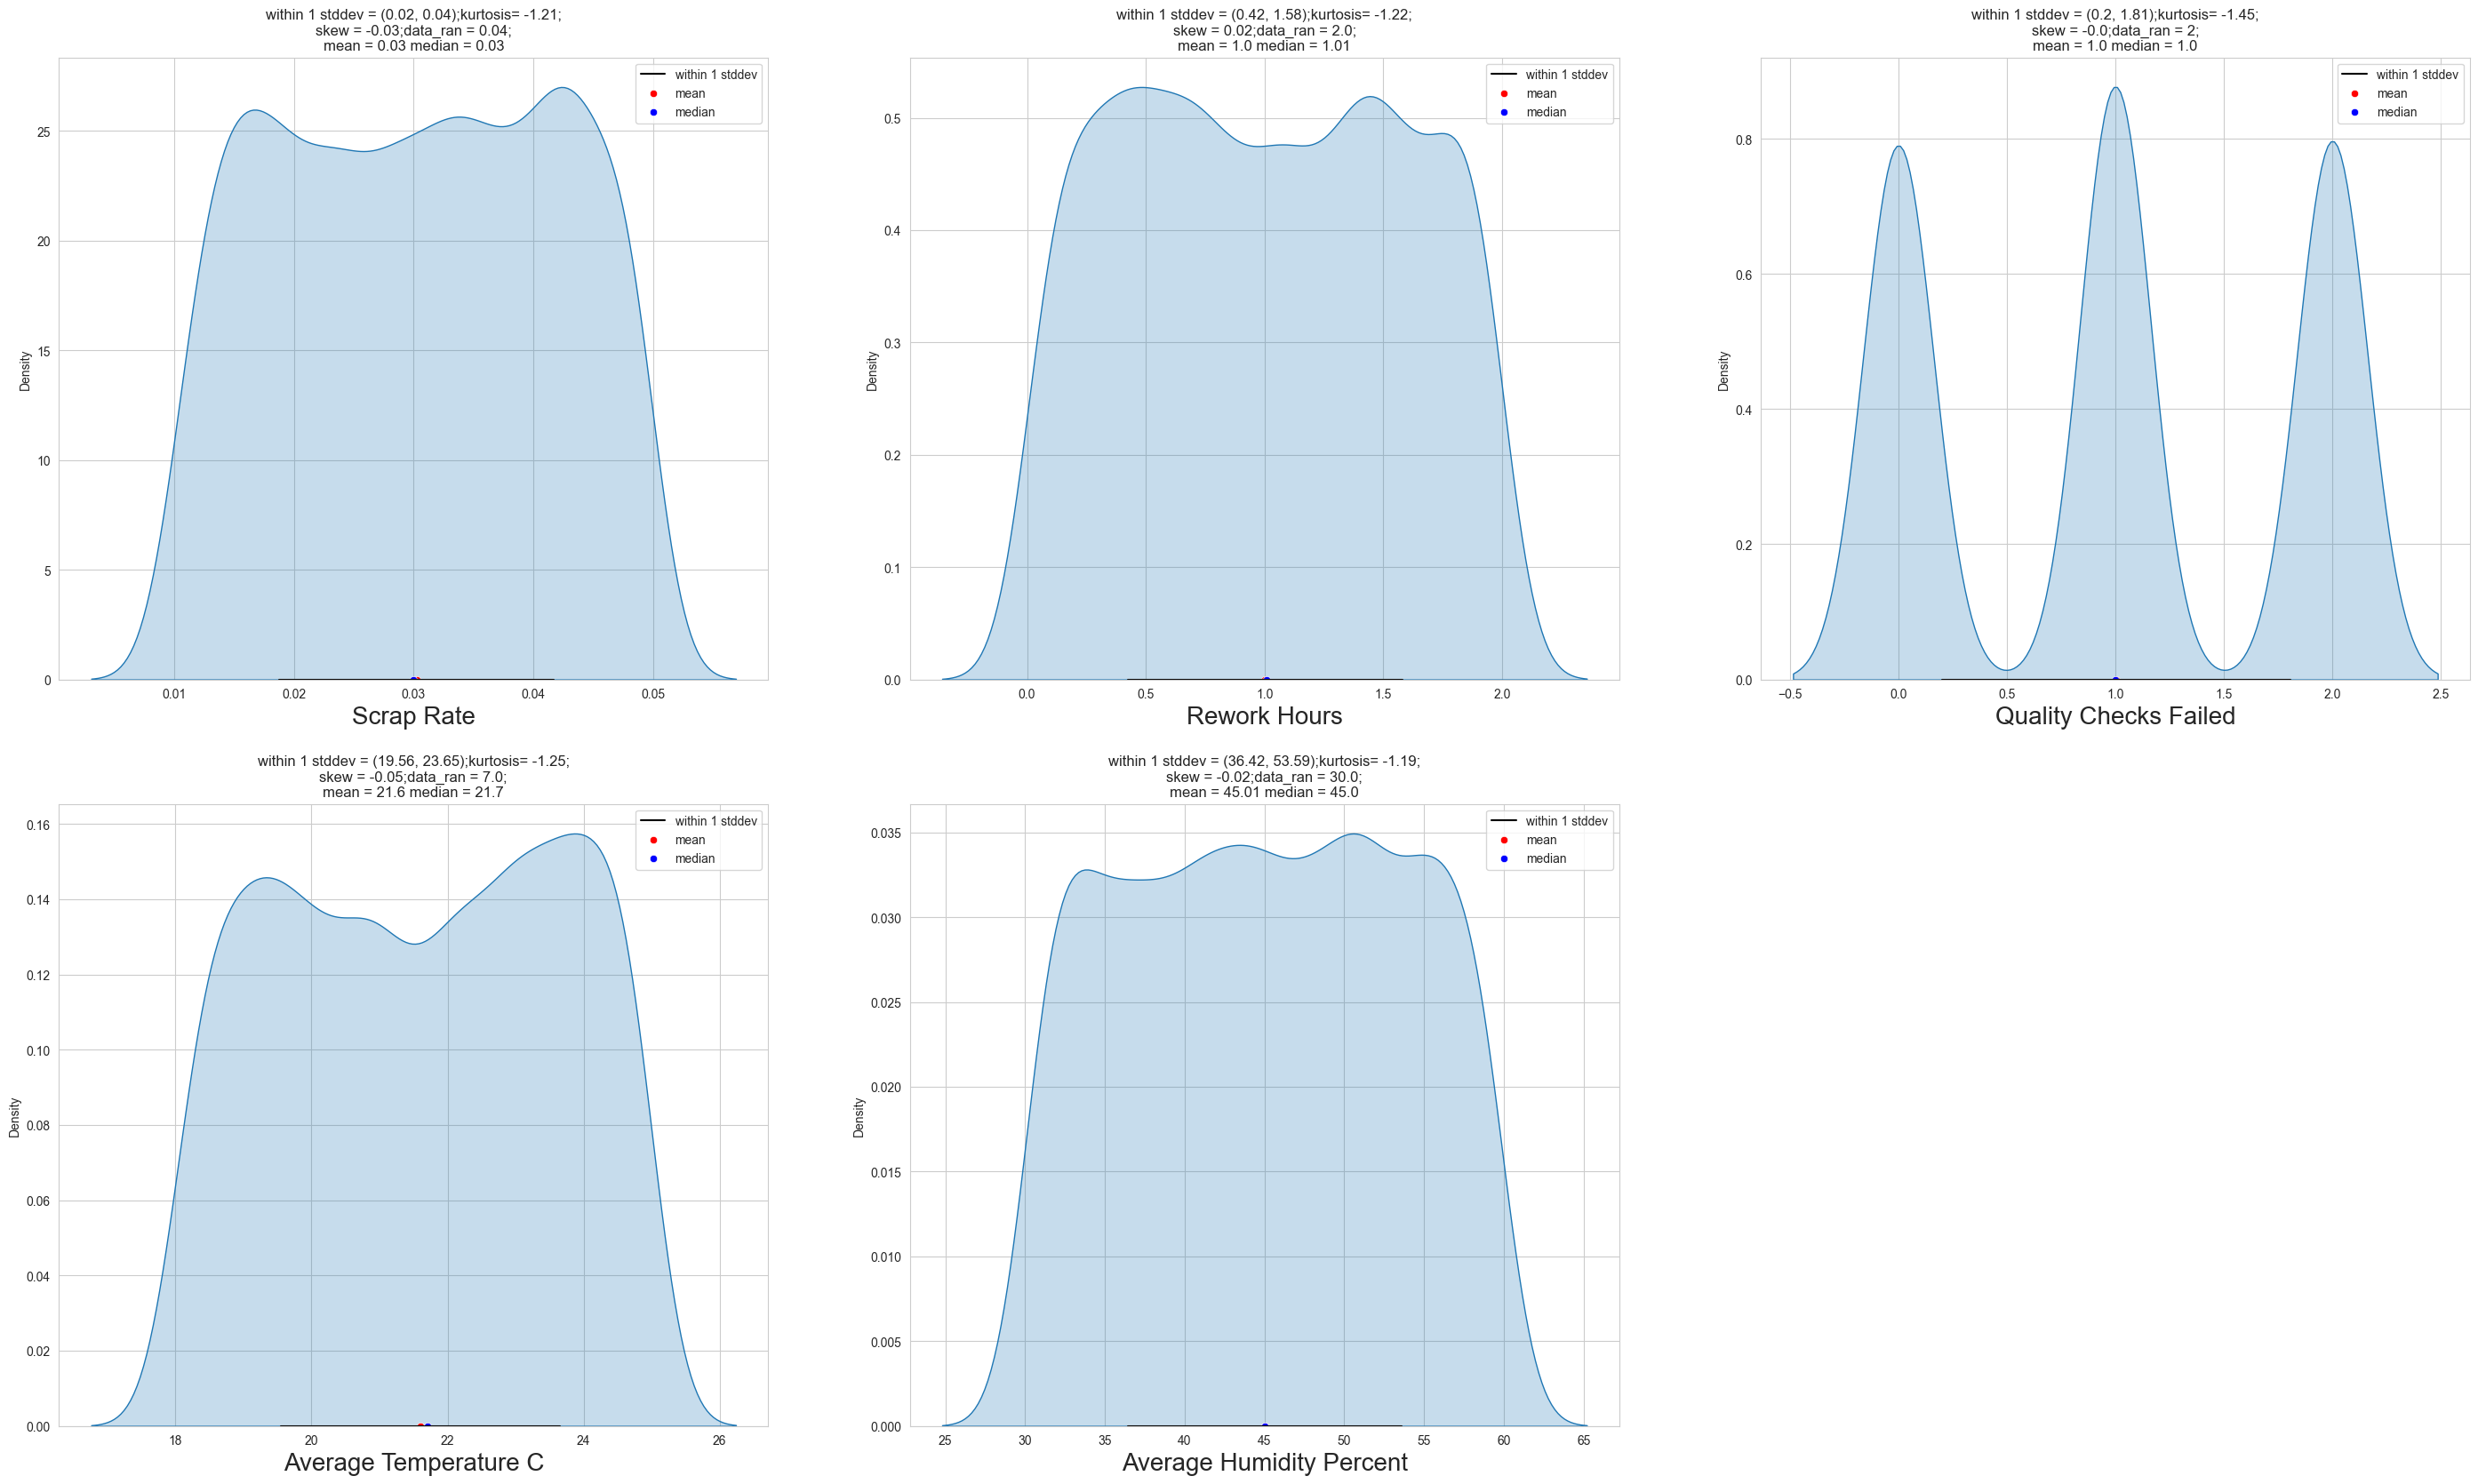

In [24]:
UniVar(df_new, group_three)

In [25]:
def iqr_cal(data, var_group, include_outlier=True):

  size = len(var_group)
  plt.figure(figsize=(7*size,20), dpi=100)

  for j,i in enumerate(var_group):
    first_quar = data[i].quantile(0.25)
    var_median = data[i].median()
    third_quar = data[i].quantile(0.75)
    inter_quar_ran = third_quar - first_quar
    whis_left = first_quar - (1.5*inter_quar_ran)
    whis_right = third_quar + (1.5*inter_quar_ran)

    #Calculating number of outliers
    outlier_high = len(data[i][data[i]>whis_right])
    outlier_low = len(data[i][data[i]<whis_left])

    #Plotting outliers and box plots
    if include_outlier==True:
      plt.subplot(2,3,j+1)
      sns.boxplot(data=data[i], orient="v")
      plt.ylabel('{}'.format(i), fontsize=20)
      plt.title('with outliers\n IQR = {}; 1st Quartile = {} Median = {} 3rd Quartile = {};\nOutliers (low/high) = {}'.format
                (
                  round(inter_quar_ran,2),
                  round(first_quar,2),
                  round(var_median,2),
                  round(third_quar,2),
                  (round(outlier_low,2), round(outlier_high,2))
                ))

    else:
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_right] = whis_right+1
      data2[i][data2[i]<whis_left] = whis_left-1
      
      # plotting without outliers
      plt.subplot(2,3,j+1)
      sns.boxplot(data=data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(inter_quar_ran,2),
                                                                                                   round(var_median,2),
                                                                                                   (round(first_quar,2),round(third_quar,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
    


1. Dealing with IQR using outlier

- Calculate the Interquartile Range (IQR) for all the numerical columns and use the IQR to identify any potential outliers in these data points.

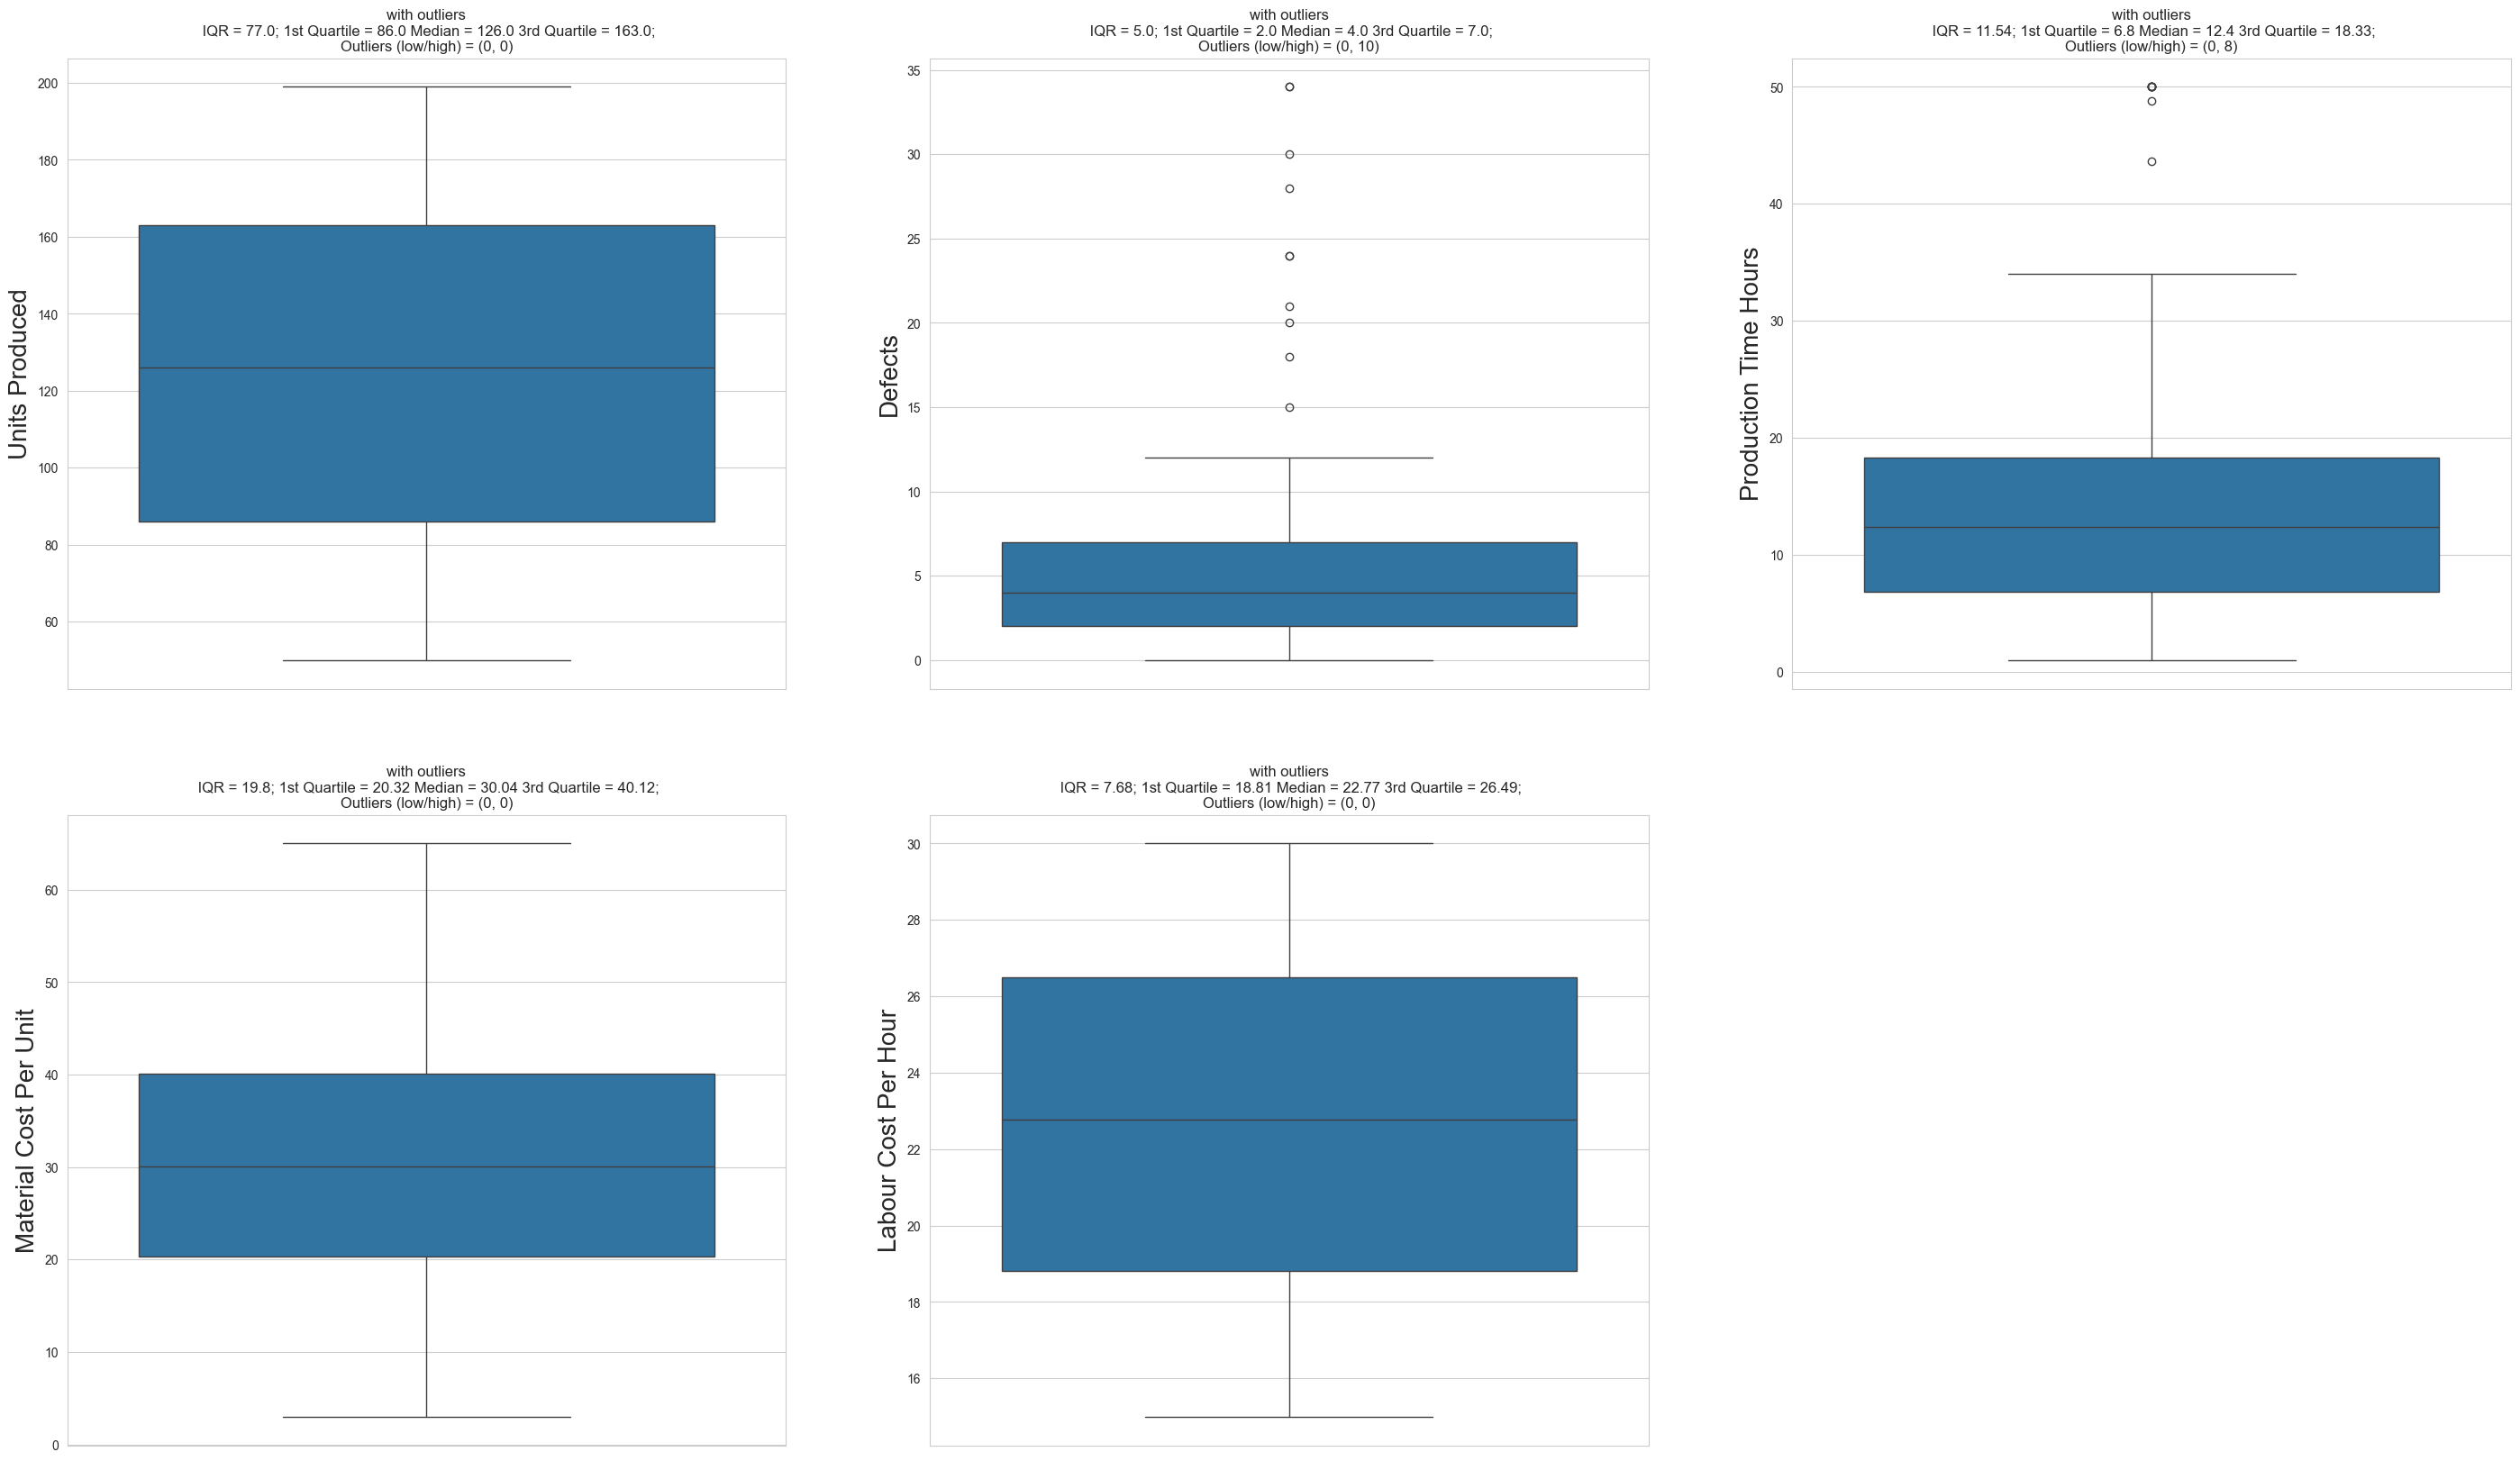

In [26]:
iqr_cal(df_new, group_one, include_outlier=True)

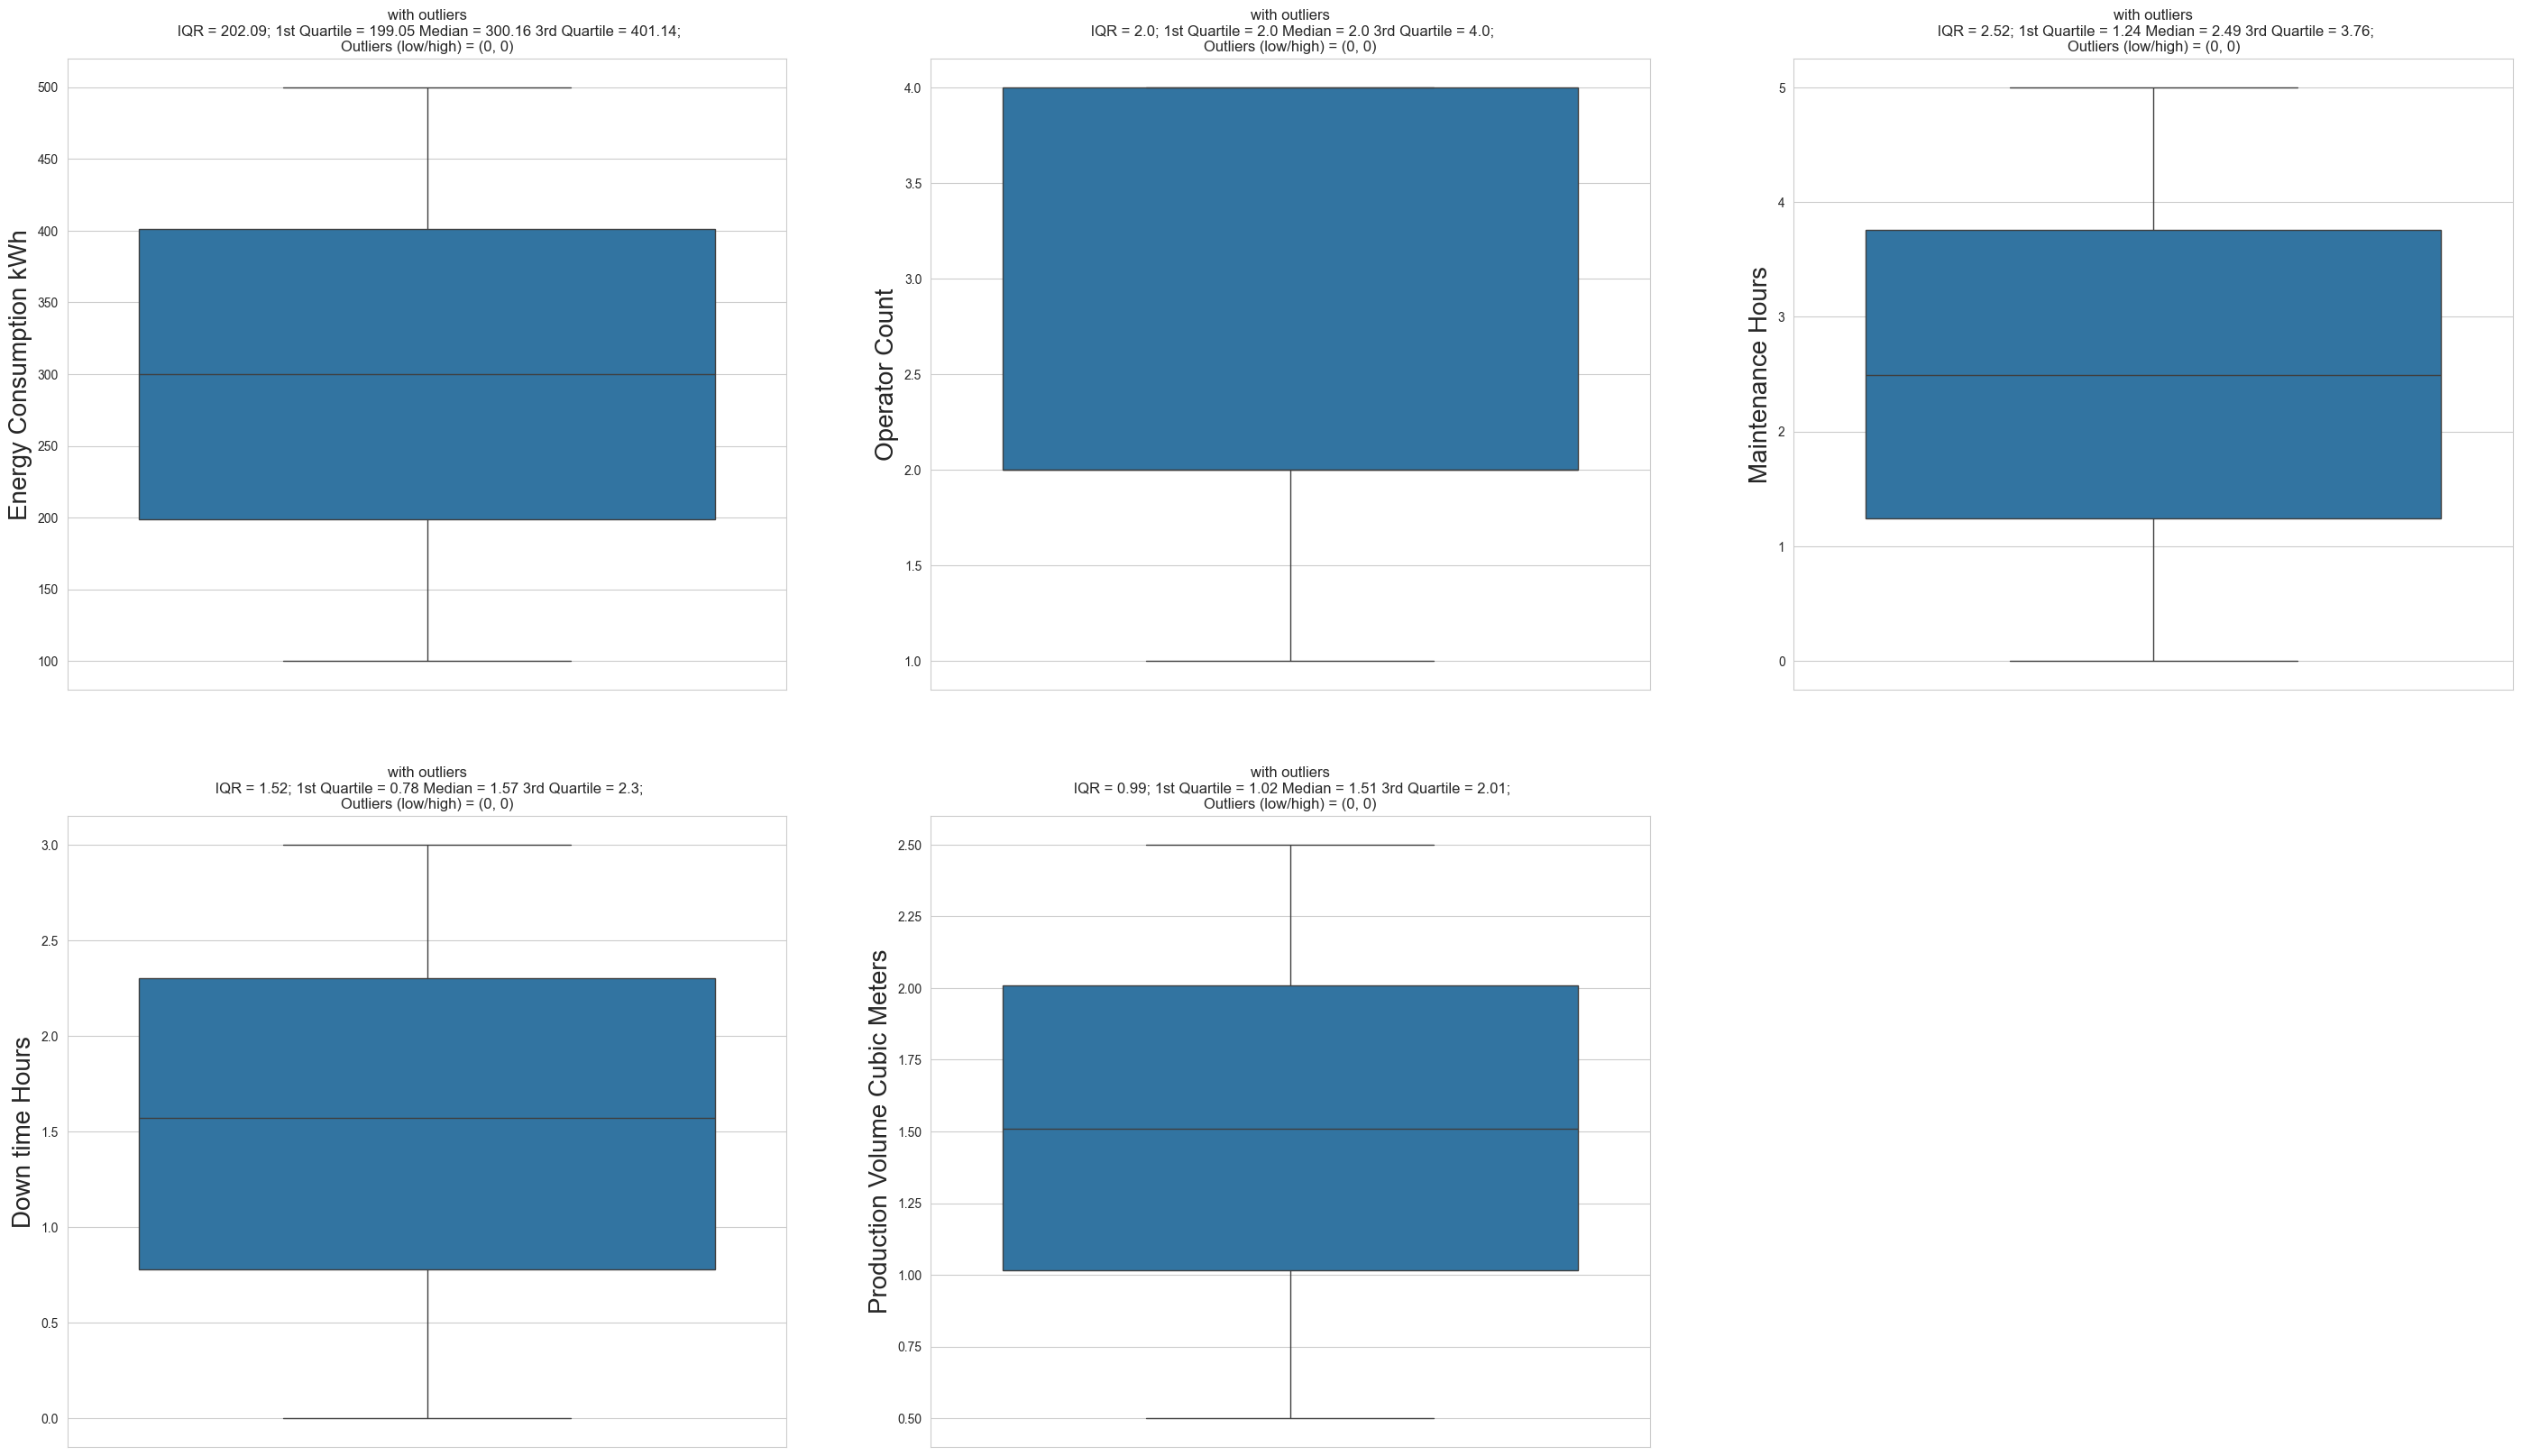

In [27]:
iqr_cal(df_new, group_two, include_outlier=True)

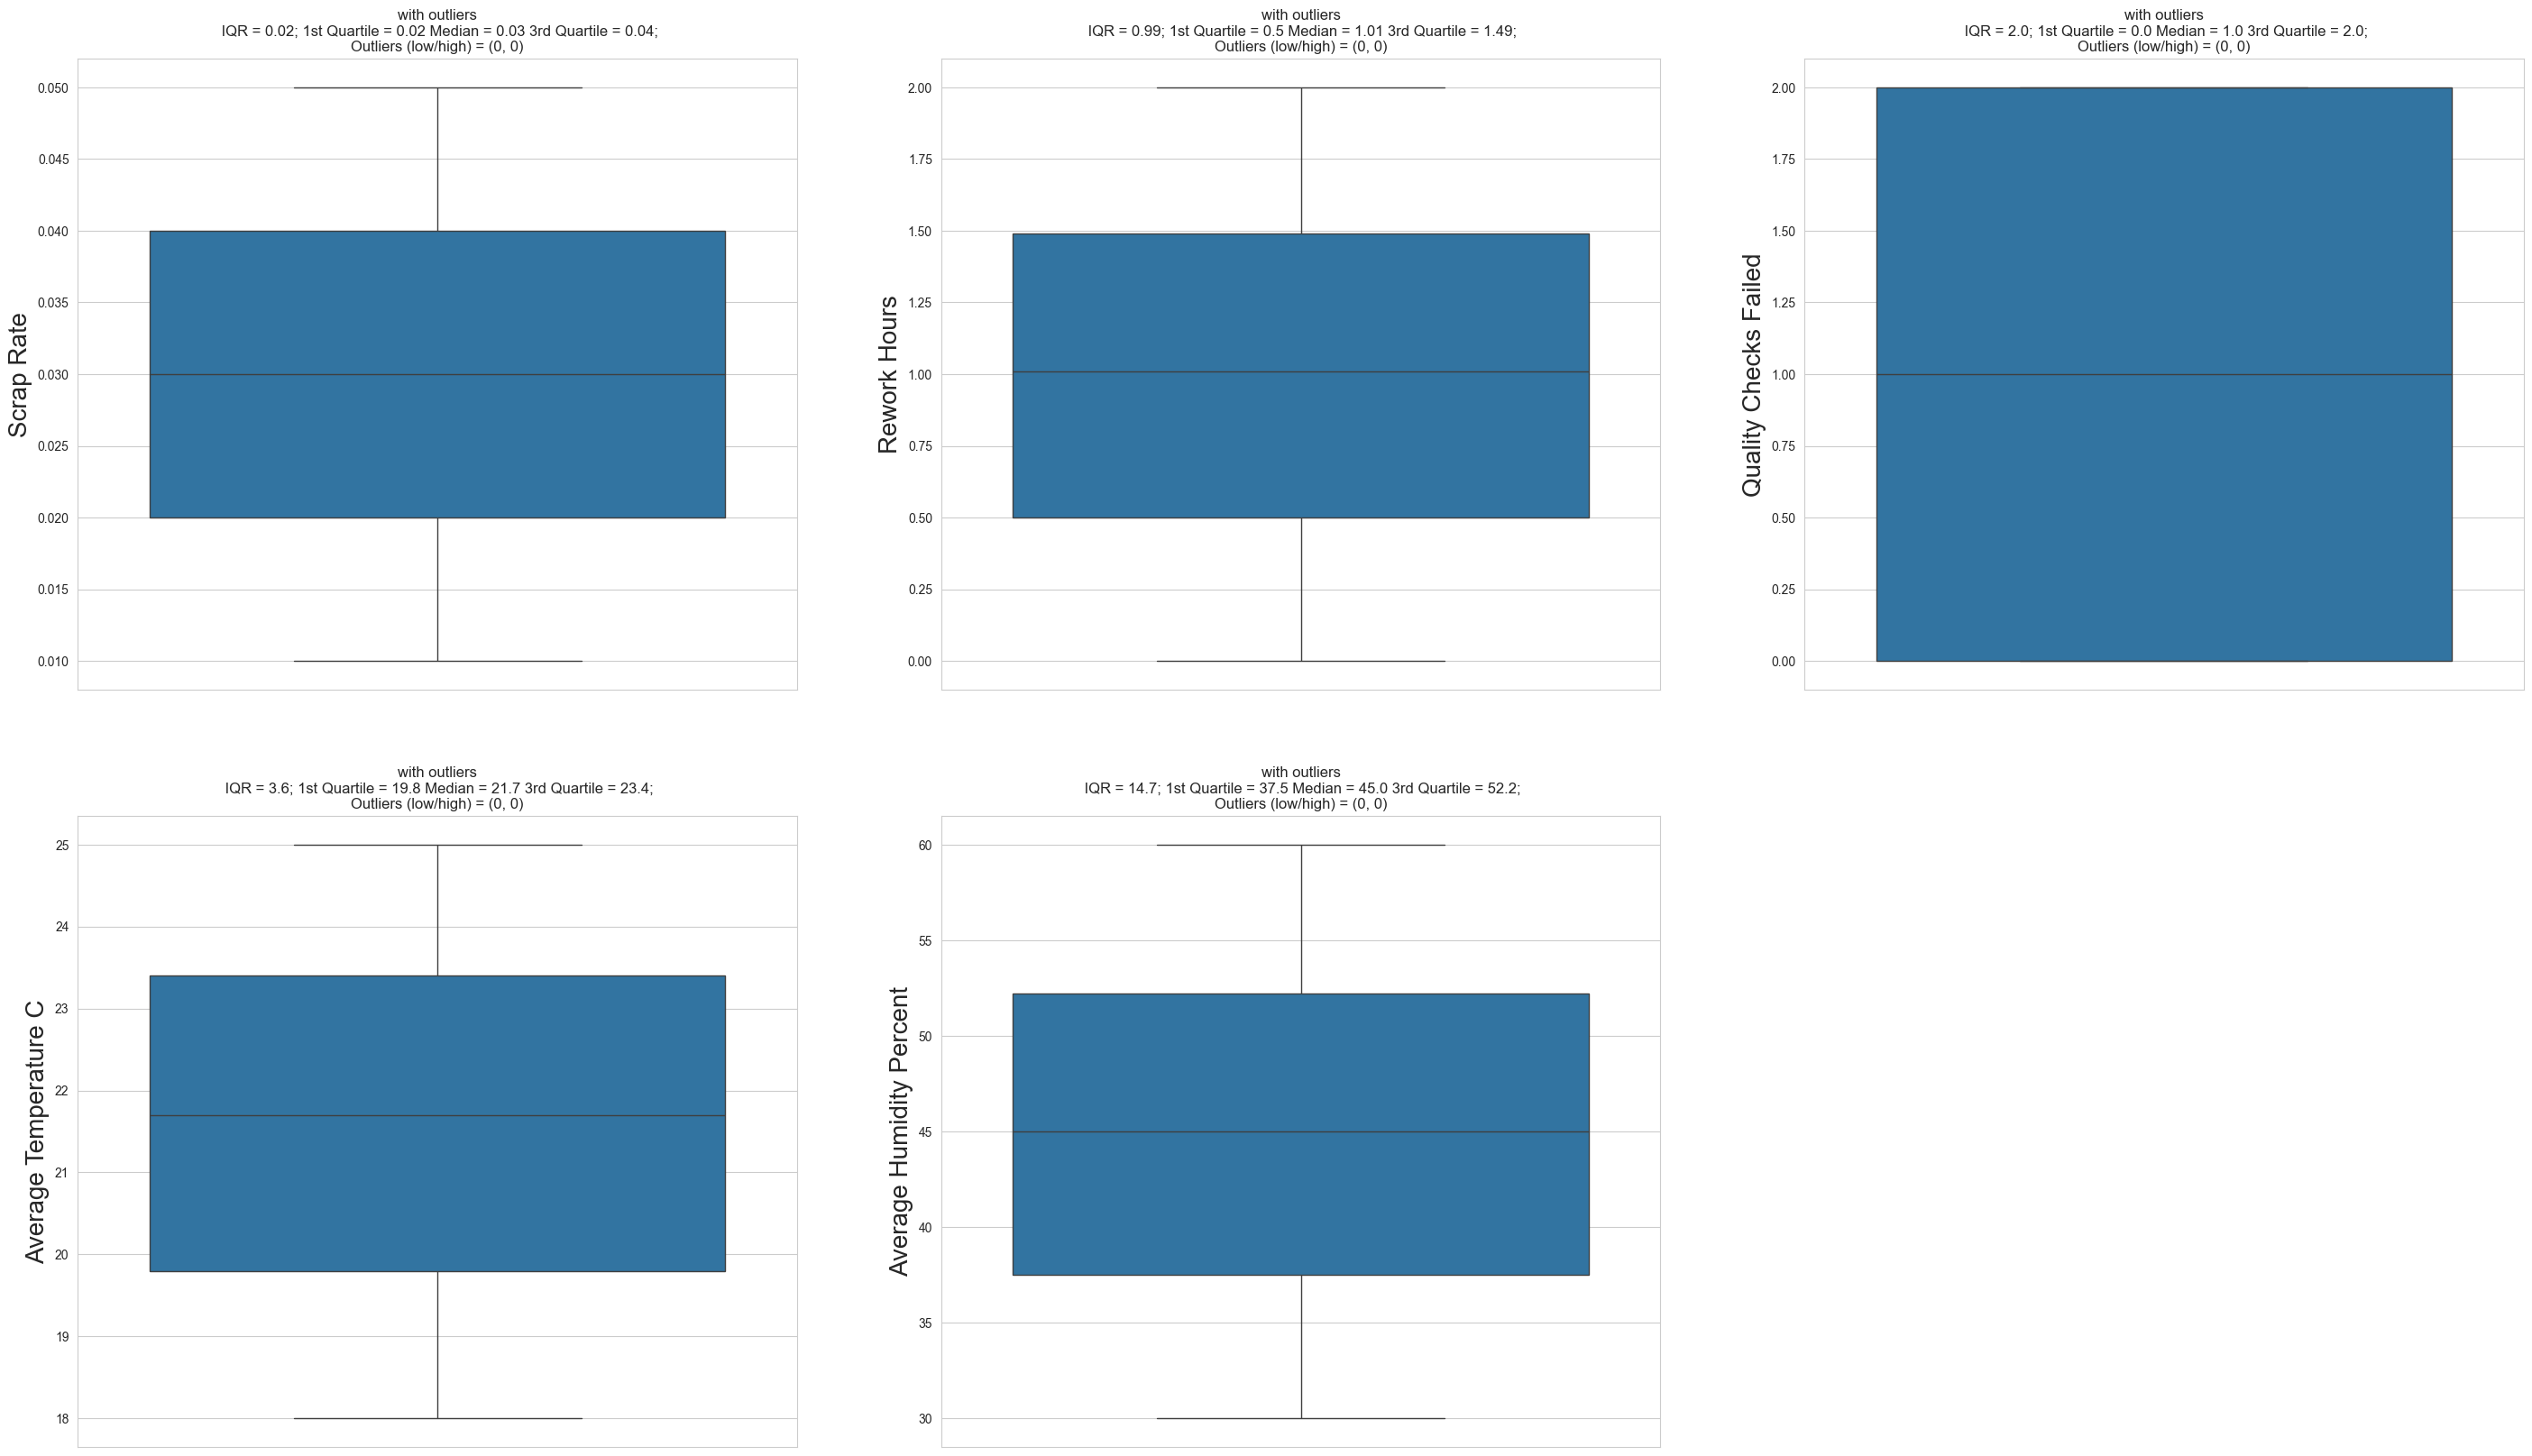

In [28]:
iqr_cal(df_new, group_three, include_outlier=True)

2. Identify Missing Values Across Key Production Metrics:

Analyse the dataset to identify missing values across all the columns and calculate the total number of missing values for each of these columns. Describe your findings and then impute all the missing values with suitable data points

In [29]:
df_new.isna().sum()

Production ID                       0
Date                                0
Product Type                        0
Machine ID                          0
Shift                               0
Units Produced                      0
Defects                           299
Production Time Hours               0
Material Cost Per Unit              0
Labour Cost Per Hour                0
Energy Consumption kWh              0
Operator Count                      0
Maintenance Hours                 300
Down time Hours                   300
Production Volume Cubic Meters      0
Scrap Rate                          0
Rework Hours                      300
Quality Checks Failed               0
Average Temperature C               0
Average Humidity Percent            0
dtype: int64

Defects has 299 missing values. Since it is numerical variable with a right skewed distribution, I will use Median to impute null values.

Maintenance Hours has 300 null values. Since it is numerical variable with a right skewed distribution, I will use Median to impute null values.

Down Time Hours has 300 null values. Since it is numerical variable with a right skewed distribution, I will use Median to impute null values.

Rework Hours has 300 null values. Since it is numerical variable with a right skewed distribution, I will use Median to impute null values

In [30]:
df_new["Defects"].fillna(value=df_new["Defects"].median(), inplace=True)
df_new["Maintenance Hours"].fillna(value=df_new["Maintenance Hours"].median(), inplace=True)
df_new["Down time Hours"].fillna(value=df_new["Down time Hours"].median(), inplace=True)
df_new["Rework Hours"].fillna(value=df_new["Rework Hours"].median(), inplace=True)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_17836\985375807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["Defects"].fillna(value=df_new["Defects"].median(), inplace=True)
C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_17836\985375807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [31]:
df_new.isna().sum()

Production ID                     0
Date                              0
Product Type                      0
Machine ID                        0
Shift                             0
Units Produced                    0
Defects                           0
Production Time Hours             0
Material Cost Per Unit            0
Labour Cost Per Hour              0
Energy Consumption kWh            0
Operator Count                    0
Maintenance Hours                 0
Down time Hours                   0
Production Volume Cubic Meters    0
Scrap Rate                        0
Rework Hours                      0
Quality Checks Failed             0
Average Temperature C             0
Average Humidity Percent          0
dtype: int64

In [32]:
quantile25 = df_new["Production Time Hours"].quantile(0.25)
quantile75 = df_new["Production Time Hours"].quantile(0.75)
IQR = quantile75 - quantile25
IQR
df_new.loc[df["Production Time Hours"] > quantile75+(1.5*IQR)]['Production Time Hours'] 
df_new["Production Time Hours"].max()

df_new.loc[df["Production Time Hours"] < quantile25 - (1.5*IQR)]['Production Time Hours']

Series([], Name: Production Time Hours, dtype: float64)

<Axes: xlabel='Defects', ylabel='Count'>

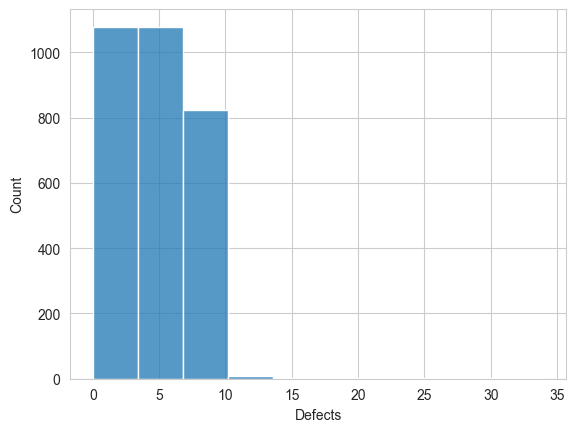

In [33]:
sns.histplot(df_new["Defects"], bins=10)

3. Relationship Between Costs:

- Is there a pattern between the cost of materials per unit and the hourly labor cost? Determine if higher costs in materials tend to coincide with higher labor costs.

In [34]:
import plotly as py
import cufflinks as cf

<Axes: xlabel='Labour Cost Per Hour', ylabel='Material Cost Per Unit'>

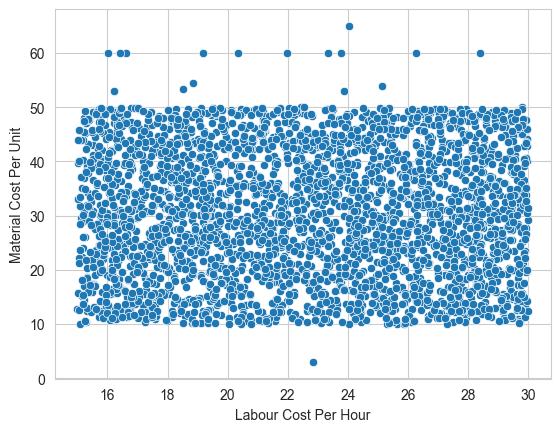

In [35]:
sns.scatterplot(x=df_new["Labour Cost Per Hour"], y=df_new["Material Cost Per Unit"])

In [36]:
df_2 = df_new[["Labour Cost Per Hour", "Material Cost Per Unit"]]
df_2.corr()

,Labour Cost Per Hour,Material Cost Per Unit
Labour Cost Per Hour,1.000000,-0.000004
Material Cost Per Unit,-0.000004,1.000000


From the above correlation table and scatterplot we can conclude there is no correlation between Material Cost and Labour Cost

4. Efficiency Across Shifts:

- Do different work shifts (Day, Swing, Night) show differences in how long products take to make or how much energy they use? Compare these shifts to see if one is more efficient or uses less energy.

<Axes: xlabel='Shift', ylabel='Production Time Hours'>

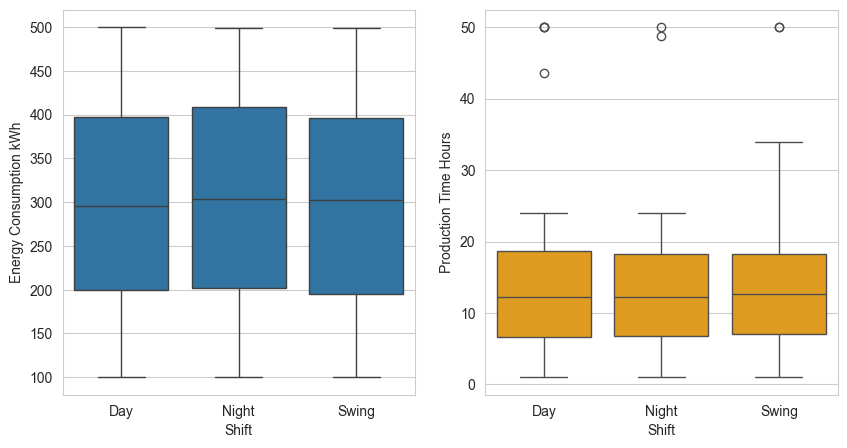

In [52]:
plt.figure(figsize=(10,5), dpi=100)
plt.subplot(1,2,1)
sns.boxplot(data=df_new, x="Shift", y="Energy Consumption kWh")
plt.subplot(1,2,2)
sns.boxplot(data=df_new, x="Shift", y="Production Time Hours", color="Orange")

In [46]:
df_energy_consumption = df_new.groupby("Shift")["Energy Consumption kWh"].agg(["mean","median"]).reset_index()
df_energy_consumption.set_index("Shift")


C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_17836\4110933613.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,mean,median
Shift,,
Day,298.903686,295.12
Night,302.865897,304.20
Swing,297.890168,303.07


In [47]:
df_time_efficiency = df_new.groupby("Shift")["Production Time Hours"].agg(["mean","median"]).reset_index()
df_time_efficiency.set_index("Shift")

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_17836\3887146395.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,mean,median
Shift,,
Day,12.595652,12.21
Night,12.524242,12.28
Swing,12.613677,12.66


Text(0.5, 1.0, 'Median Energy Consumption per Shift')

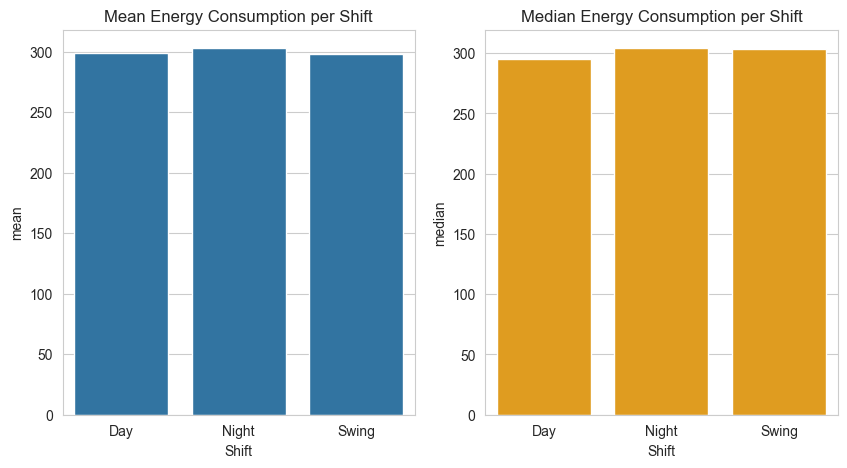

In [49]:
plt.figure(figsize=(10,5), dpi=100)
plt.subplot(1,2,1)
sns.barplot(data=df_energy_consumption, x="Shift", y="mean")
plt.title('Mean Energy Consumption per Shift')
plt.subplot(1,2,2)
sns.barplot(data=df_energy_consumption, x="Shift", y="median", color="orange")
plt.title('Median Energy Consumption per Shift')

Text(0.5, 1.0, 'Median Production Time per Shift')

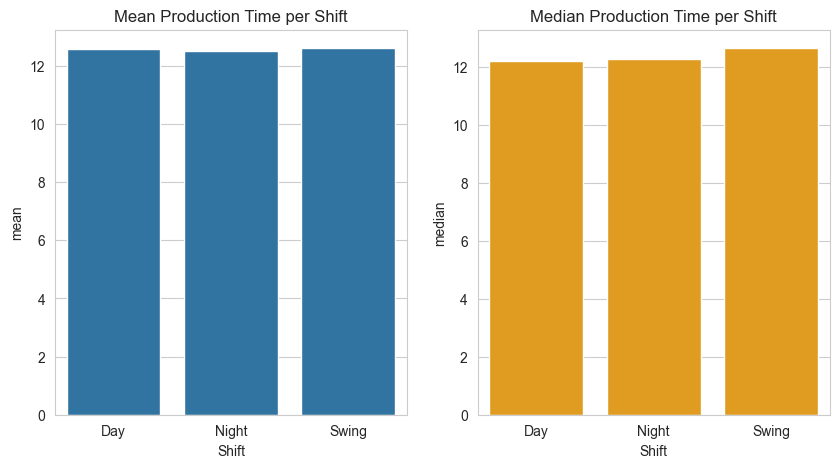

In [51]:
plt.figure(figsize=(10,5), dpi=100)
plt.subplot(1,2,1)
sns.barplot(data=df_time_efficiency, x="Shift", y="mean")
plt.title('Mean Production Time per Shift')
plt.subplot(1,2,2)
sns.barplot(data=df_time_efficiency, x="Shift", y="median", color="Orange")
plt.title('Median Production Time per Shift')

From the above boxplots, Mean and Median values and Barplots, we can see that Energy Consumption 
and Production Time is roughly identical across Shifts

5. Monthly Production Trends:

- How does the average number of units produced change from month to month? Look for any patterns, such as times of the year when production increases or decreases significantly.

In [53]:
df_new.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,1.01,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,4.0,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,1.01,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,4.0,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9


In [59]:
df_new["Month"] = df_new["Date"].dt.month
df_new

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,...,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,Month
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,...,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2,1
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,...,2,2.51,0.18,1.52,0.030,1.01,1,23.8,37.9,1
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,...,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1,1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,4.0,21.68,40.21,28.70,...,3,4.64,2.23,1.90,0.036,1.01,2,22.3,50.8,1
4,1900-01-04,2020-01-05,Electronics,14,Night,82,4.0,16.68,38.02,17.20,...,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1908-03-14,2028-03-14,Automotive,3,Swing,194,7.0,20.74,16.91,15.94,...,4,3.06,2.28,1.03,0.021,0.51,1,21.6,53.6,3
2996,1908-03-15,2028-03-15,Electronics,13,Swing,119,4.0,14.77,34.50,25.95,...,2,2.27,0.80,2.09,0.016,1.22,2,24.2,50.9,3
2997,2998,2028-03-16,Appliances,9,Day,170,2.0,20.38,33.02,18.61,...,1,4.66,1.86,1.41,0.047,0.19,0,24.2,51.4,3
2998,2999,2028-03-17,Furniture,20,Swing,199,3.0,1.01,24.35,29.73,...,3,2.73,0.26,0.93,0.029,1.26,1,24.9,56.3,3


In [60]:
df_new.dtypes

Production ID                             object
Date                              datetime64[ns]
Product Type                            category
Machine ID                                 int64
Shift                                   category
Units Produced                             int64
Defects                                  float64
Production Time Hours                    float64
Material Cost Per Unit                   float64
Labour Cost Per Hour                     float64
Energy Consumption kWh                   float64
Operator Count                             int64
Maintenance Hours                        float64
Down time Hours                          float64
Production Volume Cubic Meters           float64
Scrap Rate                               float64
Rework Hours                             float64
Quality Checks Failed                      int64
Average Temperature C                    float64
Average Humidity Percent                 float64
Month               

In [76]:
df_month_production = df_new[["Month", "Units Produced"]]
df_mp = df_month_production.groupby("Month")["Units Produced"].mean().reset_index().sort_values(by="Month", ascending=True)
df_mp

,Month,Units Produced
0,1,124.605735
1,2,124.227451
2,3,125.921053
3,4,122.670833
4,5,127.250000
5,6,125.166667
6,7,127.592742
7,8,122.282258
8,9,128.670833
9,10,120.258065


<Axes: xlabel='Month', ylabel='Units Produced'>

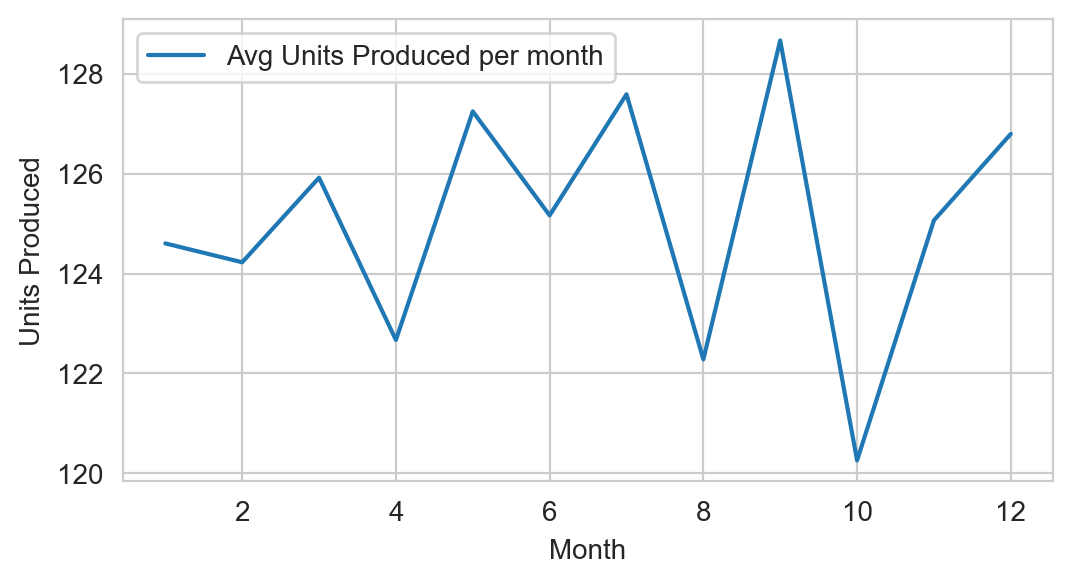

In [78]:
plt.figure(figsize=(6,3), dpi=200)
sns.lineplot(data=df_mp, x="Month", y="Units Produced", label = "Avg Units Produced per month")

Production increases in Month 9 i.e in September, it may be to cater to the increasing demand for the upcoming holiday season in November and December

6. Variability in Production by Product Type:

- Which type of product shows the most variation in how much is produced? Measure this using standard deviation to find out which product type's production volume varies the most.

In [82]:
df_product_type = df_new[["Product Type", "Units Produced"]]
df_pt = df_product_type.groupby("Product Type")["Units Produced"].std().reset_index().sort_values(by="Product Type", ascending=True)
df_pt.rename(columns={"Units Produced":"Std dev Units Produced"}, inplace=True)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_17836\962220985.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='Std dev Units Produced', ylabel='Product Type'>

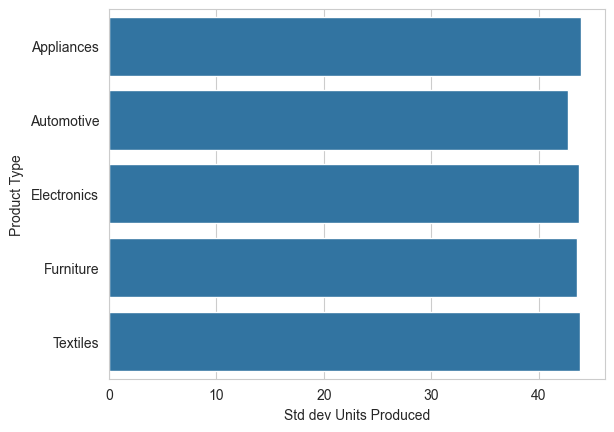

In [83]:
sns.barplot(data=df_pt, x="Std dev Units Produced", y="Product Type")

7. The Role of Operator Count in Efficiency:

- How does the number of operators affect how many units are produced per hour? Check if having more operators leads to more efficient production.

In [92]:
df_new["Units Per Hour"] = round((df_new["Units Produced"]/df_new["Production Time Hours"]),2)

In [93]:
df_new.head(3)

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,...,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,Month,Units Per Hours,Units Per Hour
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,...,1.57,2.34,0.048,1.65,1,22.8,47.2,1,6.06,6.06
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,...,0.18,1.52,0.030,1.01,1,23.8,37.9,1,22.64,22.64
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,...,2.88,0.57,0.026,0.26,0,24.5,56.1,1,8.84,8.84


In [94]:
df_new[["Units Per Hour","Operator Count"]].corr()

,Units Per Hour,Operator Count
Units Per Hour,1.000000,0.009532
Operator Count,0.009532,1.000000


<Axes: xlabel='Operator Count', ylabel='Units Per Hour'>

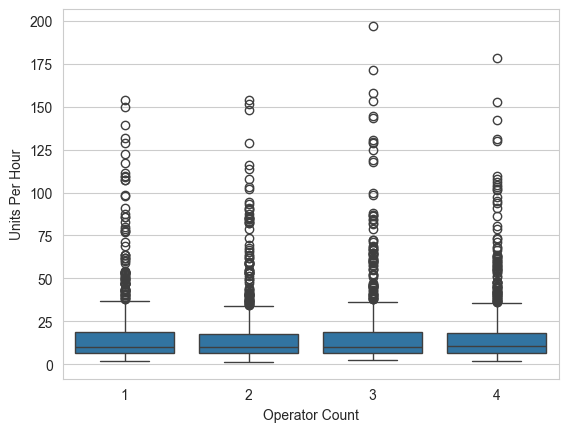

In [96]:
sns.boxplot(x=df_new["Operator Count"], y=df_new["Units Per Hour"])

In [97]:
df_new.groupby("Operator Count")["Units Per Hour"].agg(["mean","median"]).reset_index()

,Operator Count,mean,median
0,1,17.319786,9.90
1,2,16.762779,9.86
2,3,18.021997,9.94
3,4,17.500053,10.37


From the above analysis we can see the operator count doesn't have any impact on Units Produced per hour

8. Identifying the Machine with Most Defects:

- Which machine tends to produce the most defects, considering the total units it produces? Calculate the defect rate as defects per 100 units to make comparisons easier.

In [98]:
df_new["Machine Defect Rate"] = round(((df_new["Defects"]/df_new["Units Produced"])*100),2)

In [99]:
df_new.head(3)

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,...,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,Month,Units Per Hours,Units Per Hour,Machine Defect Rate
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,...,2.34,0.048,1.65,1,22.8,47.2,1,6.06,6.06,2.11
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,...,1.52,0.030,1.01,1,23.8,37.9,1,22.64,22.64,2.35
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,...,0.57,0.026,0.26,0,24.5,56.1,1,8.84,8.84,2.20


In [104]:
df_new[df_new["Machine Defect Rate"] == df_new["Machine Defect Rate"].max()]["Machine ID"]

1511    16
Name: Machine ID, dtype: int64

Machine with ID 16 has maximum defect rate

9. How Environment Affects Scrap Rate:

- Do changes in temperature and humidity affect how much scrap (waste) is produced? Analyze the data to see if there's a correlation between environmental conditions and scrap rate.

In [105]:
df_temp = df_new[["Average Temperature C", "Scrap Rate"]]
df_humidity = df_new[["Average Humidity Percent", "Scrap Rate"]]

In [106]:
print(df_temp.corr())
print(df_humidity.corr())

                       Average Temperature C  Scrap Rate
Average Temperature C                1.00000     0.02051
Scrap Rate                           0.02051     1.00000
                          Average Humidity Percent  Scrap Rate
Average Humidity Percent                  1.000000    0.029378
Scrap Rate                                0.029378    1.000000


Text(0.5, 1.0, 'Average Humidity v/s Scrap Rate')

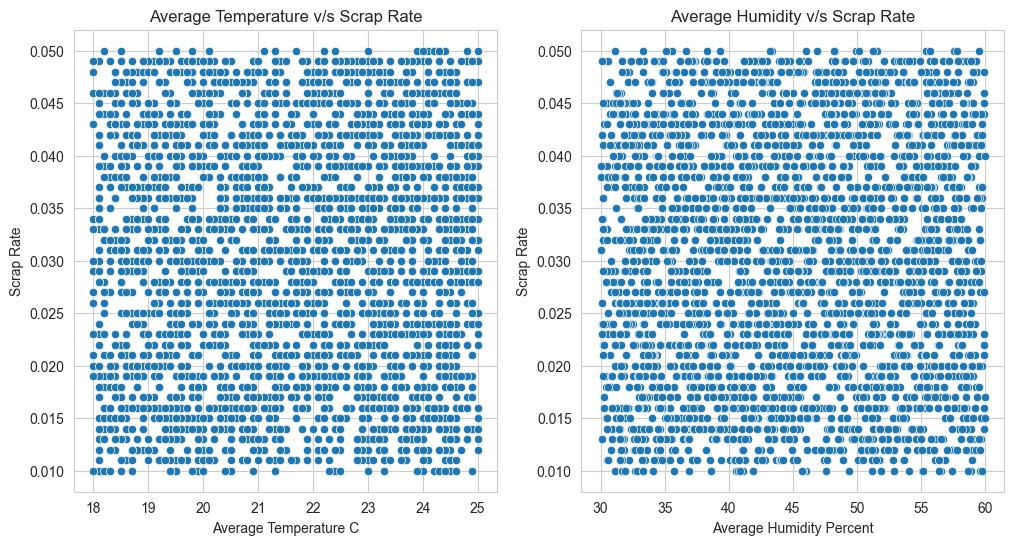

In [110]:
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(x=df_temp["Average Temperature C"], y=df_temp["Scrap Rate"])
plt.title("Average Temperature v/s Scrap Rate")
plt.subplot(1,2,2)
sns.scatterplot(x=df_humidity["Average Humidity Percent"], y=df_temp["Scrap Rate"])
plt.title("Average Humidity v/s Scrap Rate")

From the above correlation table and scatter plots we can conclude that there no correlation between enviornmental factors and scrap rate